In [1]:
# import the libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
# import tensorflow_addons as tfa
# import efficientnet.tfkeras as efn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# read the csv file with the images information
data = pd.read_csv('/Users/robsonfeliciano/Downloads/GitHub/TensorflowLite_Image_Classification_Training/train.csv')

In [3]:
data

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [4]:
data.drop_duplicates(subset=['image'],inplace=True)

In [5]:
# creating a support column
NaN = np.nan
data['label'] = NaN

In [6]:
# feeding the support column
label = 0
for i in data['label_group'].unique():
    data['label'].loc[data['label_group'] == i] = label
    label +=1

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
support = data['label'].value_counts()

In [8]:
sum(support)

32412

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_group', ylabel='count'>

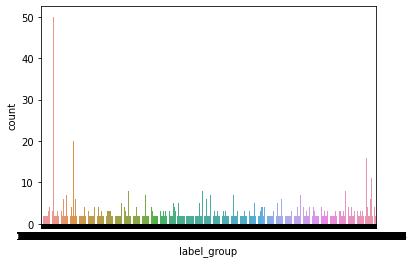

In [32]:
import seaborn as sns
sns.countplot(data['label_group'])

In [10]:
final = [support.index[i] for i in range(len(support))]

In [11]:
final

[1042.0,
 252.0,
 307.0,
 979.0,
 48.0,
 206.0,
 106.0,
 283.0,
 1071.0,
 130.0,
 1254.0,
 59.0,
 943.0,
 959.0,
 802.0,
 529.0,
 249.0,
 473.0,
 3080.0,
 550.0,
 2281.0,
 89.0,
 595.0,
 2832.0,
 2579.0,
 2725.0,
 589.0,
 119.0,
 294.0,
 1820.0,
 538.0,
 1007.0,
 410.0,
 914.0,
 77.0,
 1876.0,
 221.0,
 1384.0,
 714.0,
 174.0,
 170.0,
 3088.0,
 654.0,
 3999.0,
 2291.0,
 1213.0,
 1318.0,
 414.0,
 2801.0,
 958.0,
 2418.0,
 1791.0,
 807.0,
 167.0,
 3294.0,
 340.0,
 1967.0,
 2424.0,
 1919.0,
 984.0,
 4154.0,
 441.0,
 655.0,
 44.0,
 168.0,
 1533.0,
 755.0,
 1866.0,
 171.0,
 1123.0,
 229.0,
 498.0,
 1744.0,
 1590.0,
 1322.0,
 1905.0,
 6673.0,
 7044.0,
 3049.0,
 2156.0,
 1146.0,
 1349.0,
 3569.0,
 3490.0,
 159.0,
 2572.0,
 6520.0,
 899.0,
 437.0,
 3441.0,
 1737.0,
 2476.0,
 3093.0,
 2258.0,
 3401.0,
 3630.0,
 952.0,
 1899.0,
 1039.0,
 1904.0,
 1704.0,
 164.0,
 2175.0,
 4555.0,
 1048.0,
 1328.0,
 1795.0,
 861.0,
 621.0,
 1543.0,
 915.0,
 5577.0,
 1695.0,
 1873.0,
 2292.0,
 1789.0,
 664.0,
 1830

In [12]:
data = data[data['label'].isin(final)]

In [13]:
data

,posting_id,image,image_phash,title,label_group,label
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,0.0
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,1.0
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,2.0
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,3.0
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,4.0
...,...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725,10869.0
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533,5713.0
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785,114.0
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013,7935.0


In [14]:
# image folder address
data_path = '/Users/robsonfeliciano/Downloads/GitHub/TensorflowLite_Image_Classification_Training/shopee-product-matching'

In [15]:
batch_size = 32
img_height = 200
img_width = 200

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  labels = list(data['label']),
  label_mode = 'int',
  validation_split=0.20,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32412 files belonging to 1 classes.
Using 25930 files for training.
Metal device set to: Apple M1 Pro


2021-12-27 16:11:22.080382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-27 16:11:22.080560: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  labels = list(data['label']),
  label_mode = 'int',
  validation_split=0.20,
  subset="validation",
  seed=143,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32412 files belonging to 1 classes.
Using 6482 files for validation.


In [18]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTO)
val_ds = val_ds.cache().prefetch(buffer_size=AUTO)

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [20]:
num_classes = len(list(data['label'].unique()))

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [21]:
from keras_applications.imagenet_utils import _obtain_input_shape

In [22]:
from keras import applications

In [23]:
applications._help_

AttributeError: module 'keras.applications' has no attribute '_help_'

In [24]:
from tensorflow.keras import Model
class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [25]:
from resnet import resnet_sd_model

model = resnet_sd_model(img_shape = (180,180), img_channels = 3, 
                            layers = 152, nb_classes = num_classes, verbose = True)

ModuleNotFoundError: No module named 'resnet'

In [26]:
def create_callbacks():
    
    cpk_path = './best_model.h5'
    
    reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        mode='min',
        factor=0.1,
        patience=3,
        verbose=0
    )
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1,
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint, reducelr, earlystop]         
    
    return callbacks

In [27]:
def pairwise_distances(embeddings):
    dot_product = tf.linalg.matmul(embeddings, tf.transpose(embeddings))
    square_norm = tf.linalg.diag_part(dot_product)
    distances = tf.expand_dims(square_norm, 1) - 2.0 * dot_product + tf.expand_dims(square_norm, 0)
    distances = tf.math.maximum(distances, 0.0)

    mask = tf.cast(tf.equal(distances, 0.0),tf.float32)
    distances = distances + mask * 1e-16
    distances = tf.math.sqrt(distances)
    distances = distances * (1.0 - mask)

    return distances

def get_anchor_positive_triplet_mask(labels):
    indices_equal = tf.cast(tf.eye(tf.shape(labels)[0]), tf.bool)
    indices_not_equal = tf.math.logical_not(indices_equal)

    labels_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    mask = tf.math.logical_and(indices_not_equal, labels_equal)

    return mask

def get_anchor_negative_triplet_mask(labels):
    labels_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    mask = tf.math.logical_not(labels_equal)

    return mask

def get_triplet_mask(labels):
    indices_equal = tf.cast(tf.eye(tf.shape(labels)[0]), tf.bool)
    indices_not_equal = tf.math.logical_not(indices_equal)
    i_not_equal_j = tf.expand_dims(indices_not_equal, 2)
    i_not_equal_k = tf.expand_dims(indices_not_equal, 1)
    j_not_equal_k = tf.expand_dims(indices_not_equal, 0)

    distinct_indices = tf.math.logical_and(tf.math.logical_and(i_not_equal_j, i_not_equal_k), j_not_equal_k)


    label_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    i_equal_j = tf.expand_dims(label_equal, 2)
    i_equal_k = tf.expand_dims(label_equal, 1)

    valid_labels = tf.math.logical_and(i_equal_j, tf.logical_not(i_equal_k))

    mask = tf.math.logical_and(distinct_indices, valid_labels)

    return mask


class TripletLossFn(tf.keras.losses.Loss):
    def __init__(self,margin=1.0,**kwargs):
        super().__init__(**kwargs)
        self.margin = margin
  
    def call(self,y_true,y_pred):

        labels = tf.convert_to_tensor(y_true)
        labels = tf.squeeze(labels,axis=-1)
        embeddings = tf.convert_to_tensor(y_pred)

        pairwise_dist = pairwise_distances(embeddings)

        mask_anchor_positive = get_anchor_positive_triplet_mask(labels)
        mask_anchor_positive = tf.cast(mask_anchor_positive,tf.float32)

        anchor_positive_dist = tf.math.multiply(mask_anchor_positive, pairwise_dist)

        hardest_positive_dist = tf.math.reduce_max(anchor_positive_dist, axis=1, keepdims=True)


        mask_anchor_negative = get_anchor_negative_triplet_mask(labels)
        mask_anchor_negative = tf.cast(mask_anchor_negative,tf.float32)

        max_anchor_negative_dist = tf.math.reduce_max(pairwise_dist, axis=1, keepdims=True)
        anchor_negative_dist = pairwise_dist + max_anchor_negative_dist * (1.0 - mask_anchor_negative)


        hardest_negative_dist = tf.math.reduce_min(anchor_negative_dist, axis=1, keepdims=True)
    

        triplet_loss = tf.math.maximum(hardest_positive_dist - hardest_negative_dist + self.margin, 0.0)

        triplet_loss = tf.math.reduce_mean(triplet_loss)

        return triplet_loss
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,"margin":self.margin}

In [28]:
logits_w_temp = tf.divide(, temp)  # logits after dividing with T
 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits_w_temp))

SyntaxError: invalid syntax (457176115.py, line 1)

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics= ['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)       

In [31]:
epochs=60
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=create_callbacks(),
)

Epoch 1/60


ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:799 train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:530 minimize
        return self.apply_gradients(grads_and_vars, name=name)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:630 apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/utils.py:75 filter_empty_gradients
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['conv2d/kernel:0', 'conv2d/bias:0', 'conv2d_1/kernel:0', 'conv2d_1/bias:0', 'conv2d_2/kernel:0', 'conv2d_2/bias:0', 'dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0'].


In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=TripletLossFn(0.7),
              metrics=['accuracy'])

In [34]:
epochs=60
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=create_callbacks(),
)

Epoch 1/60


2021-12-27 16:15:20.821114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


InvalidArgumentError: Cannot assign a device for operation sequential_1/sequential/random_rotation/stateful_uniform/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node sequential_1/sequential/random_rotation/stateful_uniform/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_1_sequential_random_rotation_stateful_uniform_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential_1/sequential/random_rotation/stateful_uniform/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node sequential_1/sequential/random_rotation/stateful_uniform/RngReadAndSkip}}]] [Op:__inference_train_function_2625]

In [35]:
#### acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(27)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [36]:
test_path = '/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/test_images/0006c8e5462ae52167402bac1c2e916e.jpg'

img = keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

data[data['label'] == np.argmax(score)]

#print(
#    "This image most likely belongs to {} with a {:.2f} percent confidence."
#    .format(data[data['label'] == np.argmax(score)]['title'][0], 100 * np.max(score))
#)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/test_images/0006c8e5462ae52167402bac1c2e916e.jpg'

In [37]:
test = pd.read_csv('test.csv')

In [38]:
data[data['image_phash'] == 'ecc292392dc7687a']

,posting_id,image,image_phash,title,label_group,label


In [39]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

NameError: in user code:

    /var/folders/3j/8ntx2dl50txdncnzs2t83lqc0000gn/T/ipykernel_27122/1125200220.py:1 None  *
        lambda x, y: (normalization_layer(x), y)

    NameError: name 'normalization_layer' is not defined


In [85]:
def create_callbacks():
    
    cpk_path = './best_model.h5'
    
    reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        mode='min',
        factor=0.1,
        patience=3,
        verbose=0
    )
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1,
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint, reducelr, earlystop]         
    
    return callbacks

In [86]:
AUTO = tf.data.experimental.AUTOTUNE

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [87]:
NUM_CLASSES =  data['label'].nunique()
BATCH_SIZE = BATCH_SIZE = 16 * strategy.num_replicas_in_sync
HEIGHT,WIDTH = 512,512
CHANNELS = 3
SPLIT = int(0.8*len(train_ds))
AUTO = tf.data.experimental.AUTOTUNE
STEPS_PER_EPOCH  = SPLIT//BATCH_SIZE
VALID_STEPS = (len(train_ds)-SPLIT)//BATCH_SIZE
SEED = 143

In [88]:
class NormalizeLayer(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super(NormalizeLayer, self).__init__()

    def call(self, inputs, mask=None):
        return tf.math.l2_normalize(inputs, axis=-1)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config}
    
norm_layer = NormalizeLayer()

def create_model():
    pretrained = efn.EfficientNetB7(include_top=False, weights='noisy-student',input_shape=[HEIGHT,WIDTH, 3])
            
    x = pretrained.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = norm_layer (x)
        
    model = tf.keras.Model(pretrained.input, outputs)
    return model

model = create_model()

NameError: name 'efn' is not defined

In [89]:
def pairwise_distances(embeddings):
    dot_product = tf.linalg.matmul(embeddings, tf.transpose(embeddings))
    square_norm = tf.linalg.diag_part(dot_product)
    distances = tf.expand_dims(square_norm, 1) - 2.0 * dot_product + tf.expand_dims(square_norm, 0)
    distances = tf.math.maximum(distances, 0.0)

    mask = tf.cast(tf.equal(distances, 0.0),tf.float32)
    distances = distances + mask * 1e-16
    distances = tf.math.sqrt(distances)
    distances = distances * (1.0 - mask)

    return distances

def get_anchor_positive_triplet_mask(labels):
    indices_equal = tf.cast(tf.eye(tf.shape(labels)[0]), tf.bool)
    indices_not_equal = tf.math.logical_not(indices_equal)

    labels_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    mask = tf.math.logical_and(indices_not_equal, labels_equal)

    return mask

def get_anchor_negative_triplet_mask(labels):
    labels_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    mask = tf.math.logical_not(labels_equal)

    return mask

def get_triplet_mask(labels):
    indices_equal = tf.cast(tf.eye(tf.shape(labels)[0]), tf.bool)
    indices_not_equal = tf.math.logical_not(indices_equal)
    i_not_equal_j = tf.expand_dims(indices_not_equal, 2)
    i_not_equal_k = tf.expand_dims(indices_not_equal, 1)
    j_not_equal_k = tf.expand_dims(indices_not_equal, 0)

    distinct_indices = tf.math.logical_and(tf.math.logical_and(i_not_equal_j, i_not_equal_k), j_not_equal_k)


    label_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    i_equal_j = tf.expand_dims(label_equal, 2)
    i_equal_k = tf.expand_dims(label_equal, 1)

    valid_labels = tf.math.logical_and(i_equal_j, tf.logical_not(i_equal_k))

    mask = tf.math.logical_and(distinct_indices, valid_labels)

    return mask


class TripletLossFn(tf.keras.losses.Loss):
    def __init__(self,margin=1.0,**kwargs):
        super().__init__(**kwargs)
        self.margin = margin
  
    def call(self,y_true,y_pred):

        labels = tf.convert_to_tensor(y_true)
        labels = tf.squeeze(labels,axis=-1)
        embeddings = tf.convert_to_tensor(y_pred)

        pairwise_dist = pairwise_distances(embeddings)

        mask_anchor_positive = get_anchor_positive_triplet_mask(labels)
        mask_anchor_positive = tf.cast(mask_anchor_positive,tf.float32)

        anchor_positive_dist = tf.math.multiply(mask_anchor_positive, pairwise_dist)

        hardest_positive_dist = tf.math.reduce_max(anchor_positive_dist, axis=1, keepdims=True)


        mask_anchor_negative = get_anchor_negative_triplet_mask(labels)
        mask_anchor_negative = tf.cast(mask_anchor_negative,tf.float32)

        max_anchor_negative_dist = tf.math.reduce_max(pairwise_dist, axis=1, keepdims=True)
        anchor_negative_dist = pairwise_dist + max_anchor_negative_dist * (1.0 - mask_anchor_negative)


        hardest_negative_dist = tf.math.reduce_min(anchor_negative_dist, axis=1, keepdims=True)
    

        triplet_loss = tf.math.maximum(hardest_positive_dist - hardest_negative_dist + self.margin, 0.0)

        triplet_loss = tf.math.reduce_mean(triplet_loss)

        return triplet_loss
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,"margin":self.margin}

In [90]:
import tensorflow_addons as tfa

def compile_model(model, lr=0.0001):
    
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    #loss = tf.keras.losses.SparseCategoricalCrossentropy()
    loss = TripletLossFn(0.7) 
    metrics = [
       tf.keras.metrics.SparseCategoricalAccuracy(name='acc')
    ]

    model.compile(optimizer=optimizer, loss=loss)

    return model

ModuleNotFoundError: No module named 'tensorflow_addons'

In [91]:
EPOCHS= 50
VERBOSE =1

tf.keras.backend.clear_session()

with strategy.scope():
    
    model = create_model()
    model = compile_model(model, lr=0.0001)
   
    callbacks = create_callbacks()
    
    history = model.fit(train_ds, 
                        epochs=EPOCHS,
                        callbacks=callbacks,
                        validation_data = val_ds,
                        verbose=VERBOSE,
                        steps_per_epoch = STEPS_PER_EPOCH,
                        validation_steps=VALID_STEPS
                       )

NameError: name 'efn' is not defined

In [92]:
AUTO = tf.data.experimental.AUTOTUNE

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [93]:
train_df = pd.read_csv('/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/train.csv')

label2id = dict(zip(range(train_df.label_group.nunique()),train_df.label_group.unique()))
id2label = dict(zip(train_df.label_group.unique(),range(train_df.label_group.nunique())))
train_df["label_group"] = train_df["label_group"].map(id2label)
train_df.index = train_df["image"]

train_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/train.csv'

In [94]:
train_df["posting_label"] = np.arange(len(train_df))
tmp = train_df.groupby('label_group').posting_id.agg('unique').to_dict()
train_df['posting_ids'] = train_df.label_group.map(tmp)
train_df['posting_ids'] = train_df['posting_ids'].apply(lambda x: list(x))

tmp = train_df.groupby('label_group').posting_label.agg('unique').to_dict()
train_df['posting_labels'] = train_df.label_group.map(tmp)
train_df['posting_labels'] = train_df['posting_labels'].apply(lambda x: list(x))
train_df = train_df.drop_duplicates(subset=['image'])
train_df.head()

NameError: name 'train_df' is not defined

In [95]:
NUM_CLASSES =  train_df['label_group'].nunique()
BATCH_SIZE = BATCH_SIZE = 16 * strategy.num_replicas_in_sync
HEIGHT,WIDTH = 512,512
CHANNELS = 3
SPLIT = int(0.8*len(train_df))
AUTO = tf.data.experimental.AUTOTUNE
STEPS_PER_EPOCH  = SPLIT//BATCH_SIZE
VALID_STEPS = (len(train_df)-SPLIT)//BATCH_SIZE
SEED = 143

NameError: name 'train_df' is not defined

In [96]:
train_df.index = train_df["posting_id"]

def filepath_to_arr(filepath):
    img = tf.keras.preprocessing.image.load_img(filepath,target_size= (HEIGHT,WIDTH))
    arr = tf.keras.preprocessing.image.img_to_array(img)/255.
    return arr

def display_img(training_ids):
    num_imgs = len(training_ids)
 
    plt.figure(figsize = (5*num_imgs,10))
    for i,_id in enumerate(training_ids):
        plt.subplot(1,num_imgs+1,i+1)
        
        filepath = os.path.join("/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/shopee-product-matching/train_images/",train_df.loc[_id]["image"])
        plt.title("Image : "+str(i+1))
        arr = filepath_to_arr(filepath)
        plt.imshow(arr)
        plt.axis("off")
    plt.show()

for j in range(5):
    display_img(train_df.iloc[j]["posting_ids"])
    

train_df.index = train_df["image"]

NameError: name 'train_df' is not defined

In [97]:
#------------------
##processing image
#------------------
def process_img(filepath,label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.image.resize(image, [HEIGHT,WIDTH])
    return image,label


#-----------------------------------
##adding augmentations to image data
#-----------------------------------
def data_augment(image, label):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_crop = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
            
    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k=3) 
    elif p_rotate > .5:
        image = tf.image.rot90(image, k=2) 
    elif p_rotate > .25:
        image = tf.image.rot90(image, k=1) 
        
    
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower=.7, upper=1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower=.8, upper=1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta=.1)
        
    
    if p_crop > .7:
        if p_crop > .9:
            image = tf.image.central_crop(image, central_fraction=.7)
        elif p_crop > .8:
            image = tf.image.central_crop(image, central_fraction=.8)
        else:
            image = tf.image.central_crop(image, central_fraction=.9)
    elif p_crop > .4:
        crop_size = tf.random.uniform([], int(HEIGHT*.8), HEIGHT, dtype=tf.int32)
        image = tf.image.random_crop(image, size=[crop_size, crop_size, CHANNELS])
    
    image = tf.image.resize(image, [HEIGHT,WIDTH])
    return image,label

In [98]:
#------------------------
##preparing data pipeline
#------------------------

TRAIN_PATH = '/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/shopee-product-matching/train_images/'

files_ls = tf.io.gfile.glob(TRAIN_PATH + '*.jpg')
#labels = np.array(train_df.label_group)
labels = np.zeros((len(files_ls),))

for i,file in enumerate(files_ls):
    file = file.split("/")[-1]
    labels[i] = train_df.loc[file]["label_group"]
    #tf.one_hot(train_df.loc[file]["label_group"] ,depth = NUM_CLASSES, dtype = tf.int32)
    
    
dataset = tf.data.Dataset.from_tensor_slices((files_ls,labels))
dataset = dataset.map(process_img,num_parallel_calls=AUTO)
ds = dataset.map(data_augment,num_parallel_calls=AUTO)

train_ds = ds.take(SPLIT)
val_ds = ds.skip(SPLIT)

train_ds = train_ds.cache().repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO)
val_ds = val_ds.cache().repeat().batch(BATCH_SIZE).prefetch(AUTO)
print("Data Pipeline")

TypeError: in user code:

    /var/folders/3j/8ntx2dl50txdncnzs2t83lqc0000gn/T/ipykernel_2462/3046332839.py:5 process_img  *
        image = tf.io.read_file(filepath)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/ops/io_ops.py:138 read_file  **
        return gen_io_ops.read_file(filename, name)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/ops/gen_io_ops.py:560 read_file
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py:544 _apply_op_helper
        raise TypeError("%s expected type of %s." %

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


In [99]:
class NormalizeLayer(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super(NormalizeLayer, self).__init__()

    def call(self, inputs, mask=None):
        return tf.math.l2_normalize(inputs, axis=-1)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config}
    
norm_layer = NormalizeLayer()

def create_model():
    pretrained = efn.EfficientNetB7(include_top=False, weights='noisy-student',input_shape=[HEIGHT,WIDTH, 3])
            
    x = pretrained.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = norm_layer (x)
        
    model = tf.keras.Model(pretrained.input, outputs)
    return model

model = create_model()
#model.summary()

NameError: name 'efn' is not defined

In [100]:
############
#Custom Triplet Loss
############

def pairwise_distances(embeddings):
    dot_product = tf.linalg.matmul(embeddings, tf.transpose(embeddings))
    square_norm = tf.linalg.diag_part(dot_product)
    distances = tf.expand_dims(square_norm, 1) - 2.0 * dot_product + tf.expand_dims(square_norm, 0)
    distances = tf.math.maximum(distances, 0.0)

    mask = tf.cast(tf.equal(distances, 0.0),tf.float32)
    distances = distances + mask * 1e-16
    distances = tf.math.sqrt(distances)
    distances = distances * (1.0 - mask)

    return distances

def get_anchor_positive_triplet_mask(labels):
    indices_equal = tf.cast(tf.eye(tf.shape(labels)[0]), tf.bool)
    indices_not_equal = tf.math.logical_not(indices_equal)

    labels_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    mask = tf.math.logical_and(indices_not_equal, labels_equal)

    return mask

def get_anchor_negative_triplet_mask(labels):
    labels_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    mask = tf.math.logical_not(labels_equal)

    return mask

def get_triplet_mask(labels):
    indices_equal = tf.cast(tf.eye(tf.shape(labels)[0]), tf.bool)
    indices_not_equal = tf.math.logical_not(indices_equal)
    i_not_equal_j = tf.expand_dims(indices_not_equal, 2)
    i_not_equal_k = tf.expand_dims(indices_not_equal, 1)
    j_not_equal_k = tf.expand_dims(indices_not_equal, 0)

    distinct_indices = tf.math.logical_and(tf.math.logical_and(i_not_equal_j, i_not_equal_k), j_not_equal_k)


    label_equal = tf.math.equal(tf.expand_dims(labels, 0), tf.expand_dims(labels, 1))
    i_equal_j = tf.expand_dims(label_equal, 2)
    i_equal_k = tf.expand_dims(label_equal, 1)

    valid_labels = tf.math.logical_and(i_equal_j, tf.logical_not(i_equal_k))

    mask = tf.math.logical_and(distinct_indices, valid_labels)

    return mask


class TripletLossFn(tf.keras.losses.Loss):
    def __init__(self,margin=1.0,**kwargs):
        super().__init__(**kwargs)
        self.margin = margin
  
    def call(self,y_true,y_pred):

        labels = tf.convert_to_tensor(y_true)
        labels = tf.squeeze(labels,axis=-1)
        embeddings = tf.convert_to_tensor(y_pred)

        pairwise_dist = pairwise_distances(embeddings)

        mask_anchor_positive = get_anchor_positive_triplet_mask(labels)
        mask_anchor_positive = tf.cast(mask_anchor_positive,tf.float32)

        anchor_positive_dist = tf.math.multiply(mask_anchor_positive, pairwise_dist)

        hardest_positive_dist = tf.math.reduce_max(anchor_positive_dist, axis=1, keepdims=True)


        mask_anchor_negative = get_anchor_negative_triplet_mask(labels)
        mask_anchor_negative = tf.cast(mask_anchor_negative,tf.float32)

        max_anchor_negative_dist = tf.math.reduce_max(pairwise_dist, axis=1, keepdims=True)
        anchor_negative_dist = pairwise_dist + max_anchor_negative_dist * (1.0 - mask_anchor_negative)


        hardest_negative_dist = tf.math.reduce_min(anchor_negative_dist, axis=1, keepdims=True)
    

        triplet_loss = tf.math.maximum(hardest_positive_dist - hardest_negative_dist + self.margin, 0.0)

        triplet_loss = tf.math.reduce_mean(triplet_loss)

        return triplet_loss
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,"margin":self.margin}

In [101]:
import tensorflow_addons as tfa

def compile_model(model, lr=0.0001):
    
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    #loss = tf.keras.losses.SparseCategoricalCrossentropy()
    loss = TripletLossFn(0.7) 
    metrics = [
       tf.keras.metrics.SparseCategoricalAccuracy(name='acc')
    ]

    model.compile(optimizer=optimizer, loss=loss)

    return model

ModuleNotFoundError: No module named 'tensorflow_addons'

In [102]:
def create_callbacks():
    
    cpk_path = './best_model.h5'
    
    reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        mode='min',
        factor=0.1,
        patience=3,
        verbose=0
    )
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1,
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint, reducelr, earlystop]         
    
    return callbacks

In [103]:
EPOCHS= 50
VERBOSE =1

tf.keras.backend.clear_session()

with strategy.scope():
    
    model = create_model()
    model = compile_model(model, lr=0.0001)
   
    callbacks = create_callbacks()
    
    history = model.fit(train_ds, 
                        epochs=EPOCHS,
                        callbacks=callbacks,
                        validation_data = val_ds,
                        verbose=VERBOSE,
                        steps_per_epoch = STEPS_PER_EPOCH,
                        validation_steps=VALID_STEPS
                       )

NameError: name 'efn' is not defined

In [104]:
!pip install keras-toolkit==0.1.0rc6 -q

ERROR: Could not find a version that satisfies the requirement tensorflow (from keras-toolkit) (from versions: none)
ERROR: No matching distribution found for tensorflow


In [105]:
from functools import partial

import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet
from sklearn.model_selection import train_test_split
import keras_toolkit as kt

ModuleNotFoundError: No module named 'keras_toolkit'

In [ ]:
target_shape = (200, 200)
def preprocess_image(filename, target_shape=target_shape):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    img_str = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img_str, channels=3)
    img = tf.image.resize(img, target_shape)
    
    # Resnet-style preprocessing, see: https://git.io/JYo77
    mean = [103.939, 116.779, 123.68]
    img = img[..., ::-1]
    img -= mean

    return img


def build_triplets_dset(df, bsize=32, cache=True, shuffle=False):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """
    
    build_dataset = partial(
        kt.image.build_dataset,
        decode_fn=preprocess_image,
        bsize=bsize,
        cache=cache,
        shuffle=False
    )

    danchor = build_dataset(df.anchor)
    dpositive = build_dataset(df.positive)
    dnegative = build_dataset(df.negative)

    dset = tf.data.Dtaset.zip((danchor, dpositive, dnegative))
    
    if shuffle:
        dset = dset.shuffle(shuffle)
    
    return dset

In [ ]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('shopee-product-matching', path='shopee-training-images-200px-jpg', unzip=True)

In [106]:
COMPETITION_NAME = 'shopee-product-matching'
strategy = kt.accelerator.auto_select(verbose=True)
GCS_DS_PATH = 
BATCH_SIZE = strategy.num_replicas_in_sync * 16

SyntaxError: invalid syntax (859330756.py, line 3)

In [107]:
train = pd.read_csv('/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/train.csv')

train = train.apply(lambda col: GCS_DS_PATH + '/' + col)
train_paths, val_paths = train_test_split(train, train_size=0.8, random_state=42)
train_paths.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabriellevieira/Documents/GitHub/TensorflowLite_Image_Classification_Training/train.csv'

In [108]:
dtrain = build_triplets_dset(
    train_paths,
    bsize=BATCH_SIZE,
    cache=True,
    shuffle=8192
)

dvalid = build_triplets_dset(
    val_paths,
    bsize=BATCH_SIZE,
    cache=True,
    shuffle=False
)

NameError: name 'build_triplets_dset' is not defined

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet


target_shape = (200, 200)

In [41]:
cache_dir = Path(Path.home()) / ".keras"
anchor_images_path = cache_dir / "left"
positive_images_path = cache_dir / "right"

In [42]:
!gdown --id 1jvkbTr_giSP3Ru8OwGNCg6B4PvVbcO34
!gdown --id 1EzBZUb_mh_Dp_FKD0P4XiYYSd0QBH5zW
!unzip -oq left.zip -d $cache_dir
!unzip -oq right.zip -d $cache_dir

zsh:1: command not found: gdown
zsh:1: command not found: gdown
unzip:  cannot find or open left.zip, left.zip.zip or left.zip.ZIP.
unzip:  cannot find or open right.zip, right.zip.zip or right.zip.ZIP.


In [43]:
def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image


def preprocess_triplets(anchor, positive, negative):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )

In [44]:
# We need to make sure both the anchor and positive images are loaded in
# sorted order so we can match them together.
anchor_images = sorted(
    [str(anchor_images_path / f) for f in os.listdir(anchor_images_path)]
)

positive_images = sorted(
    [str(positive_images_path / f) for f in os.listdir(positive_images_path)]
)

image_count = len(anchor_images)

anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)

# To generate the list of negative images, let's randomize the list of
# available images and concatenate them together.
rng = np.random.RandomState(seed=42)
rng.shuffle(anchor_images)
rng.shuffle(positive_images)

negative_images = anchor_images + positive_images
np.random.RandomState(seed=32).shuffle(negative_images)

negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
negative_dataset = negative_dataset.shuffle(buffer_size=4096)

dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

# Let's now split our dataset in train and validation.
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/robsonfeliciano/.keras/left'

In [45]:
base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=target_shape + (3,), include_top=False
)

flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(512, activation="relu")(flatten)
dense1 = layers.BatchNormalization()(dense1)
dense2 = layers.Dense(256, activation="relu")(dense1)
dense2 = layers.BatchNormalization()(dense2)
output = layers.Dense(256)(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")

trainable = False
for layer in base_cnn.layers:
    if layer.name == "conv5_block1_out":
        trainable = True
    layer.trainable = trainable

In [46]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


anchor_input = layers.Input(name="anchor", shape=target_shape + (3,))
positive_input = layers.Input(name="positive", shape=target_shape + (3,))
negative_input = layers.Input(name="negative", shape=target_shape + (3,))

distances = DistanceLayer()(
    embedding(resnet.preprocess_input(anchor_input)),
    embedding(resnet.preprocess_input(positive_input)),
    embedding(resnet.preprocess_input(negative_input)),
)

siamese_network = Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [47]:
class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [48]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
siamese_model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /var/folders/3j/8ntx2dl50txdncnzs2t83lqc0000gn/T/ipykernel_27122/2555165863.py:26 train_step
        loss = self._compute_loss(data)
    /var/folders/3j/8ntx2dl50txdncnzs2t83lqc0000gn/T/ipykernel_27122/2555165863.py:52 _compute_loss
        ap_distance, an_distance = self.siamese_network(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer model expects 3 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 200, 200, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=float32>]
